# Kaggle competition dataset

In [1]:
# importing required libraraies
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [2]:
# read the titanic dataset
titan=pd.read_csv("train.csv")
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


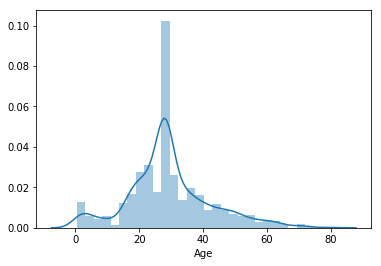

In [3]:
# there is no much deviation in Age variable after filling NA values with median so we are taking median for NA.
titan["Age"]=titan["Age"].fillna(titan["Age"].median())# filling NA values with median because there is no much variation
titan["Age"].astype('int64').dtypes # converting data type for visualization (float or NA values distplot will not take)
sns.distplot(titan["Age"])

In [4]:
# creating One Hot Coding or Dummy variable
pcl=pd.get_dummies(titan['Pclass'],drop_first=True)
sex=pd.get_dummies(titan['Sex'],drop_first=True)
embark=pd.get_dummies(titan['Embarked'],drop_first=True)
titan=pd.concat([titan,pcl,sex,embark], axis=1)

In [5]:
# eleminating(droping) unnecessary variables
titan.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1, inplace=True)
titan.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,1,0,1


In [6]:
x=titan.drop('Survived', axis=1)
y=titan['Survived']

In [7]:
X_train,x_test,Y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=10)

In [8]:
pruned=DecisionTreeClassifier(criterion="entropy",max_depth=4)
pruned.fit(X_train,Y_train)
print(pruned.score(x_test,y_test))

0.8507462686567164


# Now let's do Kaggle competition titanic test dataset.

In [9]:
# this is Kaggle submission dataset
# make prediction and submit the test file in Kaggle
test=pd.read_csv("test.csv")
test.head()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


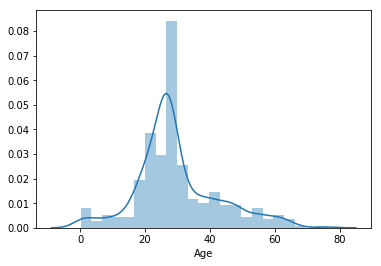

In [10]:
# there is no much deviation in Age variable after filling NA values with median so we are taking median for NA.
test["Age"]=test["Age"].fillna(test["Age"].median())# filling NA values with median because there is no much variation
test["Age"].astype('int64').dtypes # converting data type for visualization (float or NA values distplot will not take)
sns.distplot(test["Age"])

In [41]:
# creating One Hot Coding or Dummy variable
test["Fare"]=test["Fare"].fillna(test["Fare"].median())
pcl=pd.get_dummies(test['Pclass'],drop_first=True)
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test=pd.concat([test,pcl,sex,embark], axis=1)

# eleminating(droping) unnecessary variables
test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1, inplace=True)
test.head()

,PassengerId,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,892,34.5,0,0,7.8292,0,1,1,1,0
1,893,47.0,1,0,7.0000,0,1,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,1,0
3,895,27.0,0,0,8.6625,0,1,1,0,1
4,896,22.0,1,1,12.2875,0,1,0,0,1


In [43]:
test.isnull().sum()
final_predictions=pruned.predict(test)
PassengerId=test["PassengerId"]
PassengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [44]:
# create test prediction test dataset
output = pd.DataFrame({'PassengerId':PassengerId, 'Survived': final_predictions})

In [45]:
# convert test file for Kaggle submission
output.to_csv('submission.csv', index=False)
output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0


In [71]:
pruned=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=2)
pruned.fit(X_train,Y_train)
print(pruned.score(x_test,y_test))


0.8544776119402985


In [96]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=4,bootstrap="True")
rfcl.fit(X_train,Y_train)
print(rfcl.score(x_test,y_test))

0.8208955223880597


In [97]:
0.8582089552238806-0.8507462686567164

0.007462686567164201

In [ ]:
Decision Tree has given good result.